![](https://drive.google.com/uc?export=view&id=1AFwhUb9nDTvKm4D6UtSE1Dtjv20THqLX)

<h1><b>Santander Product Recommendation</b></h1>
<h2><i>Can you pair products with people?</i></h2>

#<h2><b> 10. Feature Transformation </b></h2>


##<h3><b> 10.1 Cateogrical Feature Encoding </b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import math
import os
from google.colab import drive
import matplotlib.patches as mpatches
import gc

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/21_My_Case_Study_1/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_treated = pd.read_pickle('train_treated.pkl')
test_treated = pd.read_pickle('test_treated.pkl')

In [3]:
features = ['Date', 'CustomerID', 'Employee', 'Cust_Country', 'Sex', 'Age','EntryDate', 'New',
            'Seniority', 'PrimaryCustomer', 'CustomerType','CustomerRelationType', 'SameResidenceCountry',
            'OtherBirthCountry','EntryChannel', 'ProvinceCode', 'ProvinceName', 'GrossIncome','Segment',
            'Deceased', 'Active']

cat_feat = ['Employee', 'Cust_Country', 'Sex','New','PrimaryCustomer','CustomerType','CustomerRelationType',
            'SameResidenceCountry','OtherBirthCountry','EntryChannel', 'ProvinceCode','ProvinceName','Segment',
            'Deceased','Active']
            
numerical_feat = ['Age','Seniority','GrossIncome']

date_feat = ['EntryDate']

product_feat = ['CurrentAccounts', 'DerivadaAccount','PayrollAccount', 'JuniorAccount', 'MoreParticularAccount',
                'ParticularAccount', 'ParticularPlusAccount', 'E_Account', 'Funds','Pensions_1', 'Loans', 
                'Taxes', 'CreditCard', 'Securities', 'Payroll','Pensions_2', 'DirectDebit']

In [4]:
for col in cat_feat:
  train_treated[col] = train_treated[col].astype(str)
  test_treated[col] = test_treated[col].astype(str)

###<h4><b> 10.1.1 Label Encoding using Sklearn </b></h4>

In [5]:
from sklearn import preprocessing

le_pn = preprocessing.LabelEncoder()
le_pn.fit(train_treated['ProvinceName'])
ProvinceName_enc_tr   =  le_pn.transform(train_treated['ProvinceName'])
ProvinceName_enc_test =  le_pn.transform(test_treated['ProvinceName'])

le_pc = preprocessing.LabelEncoder()
le_pc.fit(train_treated['ProvinceCode'])
ProvinceCode_enc_tr   =  le_pc.transform(train_treated['ProvinceCode'])
ProvinceCode_enc_test =  le_pc.transform(test_treated['ProvinceCode'])

le_ec = preprocessing.LabelEncoder()
le_ec.fit(train_treated['EntryChannel'])
EntryChannel_enc_tr   =  le_ec.transform(train_treated['EntryChannel'])
EntryChannel_enc_test =  le_ec.transform(test_treated['EntryChannel'])

le_cc = preprocessing.LabelEncoder()
le_cc.fit(train_treated['Cust_Country'])
Cust_Country_enc_tr   =  le_cc.transform(train_treated['Cust_Country'])
Cust_Country_enc_test =  le_cc.transform(test_treated['Cust_Country'])


In [6]:
train_treated['ProvinceName'] = ProvinceName_enc_tr
train_treated['ProvinceCode'] = ProvinceCode_enc_tr
train_treated['EntryChannel'] = EntryChannel_enc_tr
train_treated['Cust_Country'] = Cust_Country_enc_tr

test_treated['ProvinceName'] = ProvinceName_enc_test
test_treated['ProvinceCode'] = ProvinceCode_enc_test
test_treated['EntryChannel'] = EntryChannel_enc_test
test_treated['Cust_Country'] = Cust_Country_enc_test

###<h4><b> 10.1.2 Manual Label Encoding </b></h4>

In [7]:
cat_map_dict = {'Employee'     : {'-99':0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
                'Sex'          : {'V':0, 'H':1, '-99':2}, 
                'CustomerType'   : {'-99':0,'1':1,'2':2,'3':3, '4':4, '5':5},
                'CustomerRelationType': {'-99':0, 'I':1, 'A':2, 'P':3, 'R':4}, 
                'SameResidenceCountry': {'-99':0, 'S':1, 'N':2}, 
                'OtherBirthCountry'   : {'-99':0, 'S':1, 'N':2},
                'Deceased': {'-99':0, 'S':1, 'N':2}, 
                'Active'  : {'0.0':0, '1.0':1, '-99.0':2},
                'Segment'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, '-99':3}
                }
cat_cols = list(cat_map_dict.keys())

In [8]:
for col in cat_cols:
  train_treated[col] = train_treated[col].map(cat_map_dict[col]) 

for col in cat_cols:
  test_treated[col] = test_treated[col].map(cat_map_dict[col]) 

##<h3><b> 10.2 Min Max Scaling Numerical Features </b></h3>

In [9]:
from sklearn import preprocessing

mm_scaler_age = preprocessing.MinMaxScaler()
age_minmax_tr = mm_scaler_age.fit_transform(train_treated['Age'].values.reshape(-1,1))
age_minmax_test = mm_scaler_age.transform(test_treated['Age'].values.reshape(-1,1))

mm_scaler_sen = preprocessing.MinMaxScaler()
sen_minmax_tr = mm_scaler_sen.fit_transform(train_treated['Seniority'].values.reshape(-1,1))
sen_minmax_test = mm_scaler_sen.transform(test_treated['Seniority'].values.reshape(-1,1))

mm_scaler_inc = preprocessing.MinMaxScaler()
inc_minmax_tr = mm_scaler_inc.fit_transform(train_treated['GrossIncome'].values.reshape(-1,1))
inc_minmax_test = mm_scaler_inc.transform(test_treated['GrossIncome'].values.reshape(-1,1))

In [10]:
train_treated['Age'] = age_minmax_tr
train_treated['Seniority'] = sen_minmax_tr
train_treated['GrossIncome'] = inc_minmax_tr

test_treated['Age'] = age_minmax_test
test_treated['Seniority'] = sen_minmax_test
test_treated['GrossIncome'] = inc_minmax_test

In [11]:
train_treated['Age'] = round(train_treated['Age'],2)
train_treated['Seniority'] = round(train_treated['Seniority'],2)
train_treated['GrossIncome'] = round(train_treated['GrossIncome'],2)

test_treated['Age'] = round(test_treated['Age'],2)
test_treated['Seniority'] = round(test_treated['Seniority'],2)
test_treated['GrossIncome'] = round(test_treated['GrossIncome'],2)

##<h3><b> 10.3 Finding Correlated Features </b></h3>

In [12]:
data = train_treated[features[2:]]

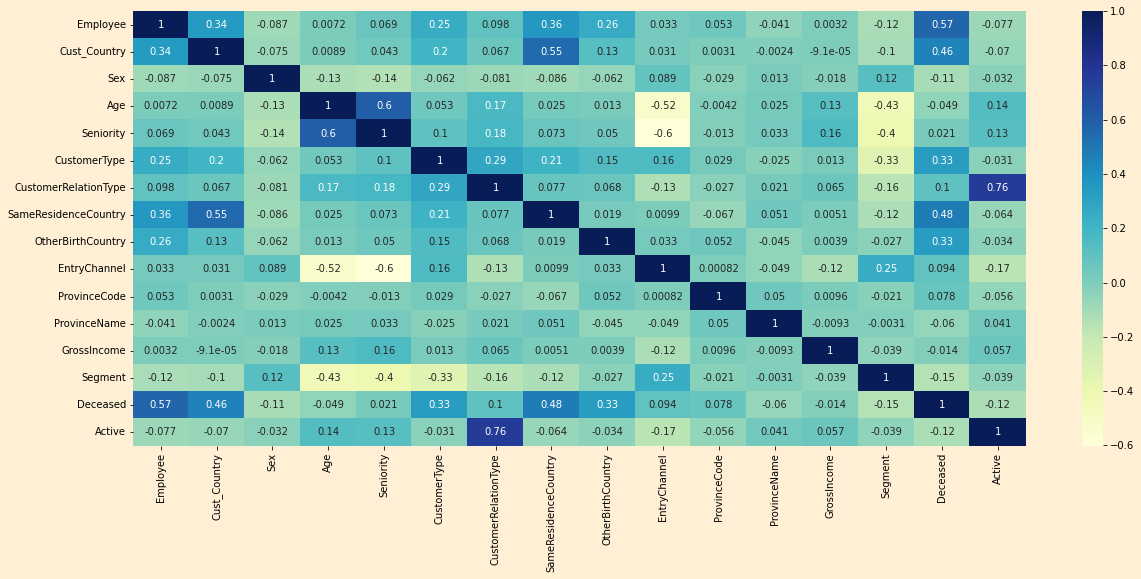

In [13]:
plt.figure(figsize=(20,8),facecolor='papayawhip')
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

<b>I didn't find any features which are strongly correlated from the Correlation Matrix</b>

Intuitively, EntryDate and Seniority should be correlated hence let's check.

In [15]:
corr_df1= train_treated[['EntryDate','Seniority']]
corr_df1['yearmonth'] = corr_df1['EntryDate'].apply(lambda x: (100*x.year) + x.month)
corr_df1 = corr_df1.groupby('yearmonth')['Seniority'].mean()

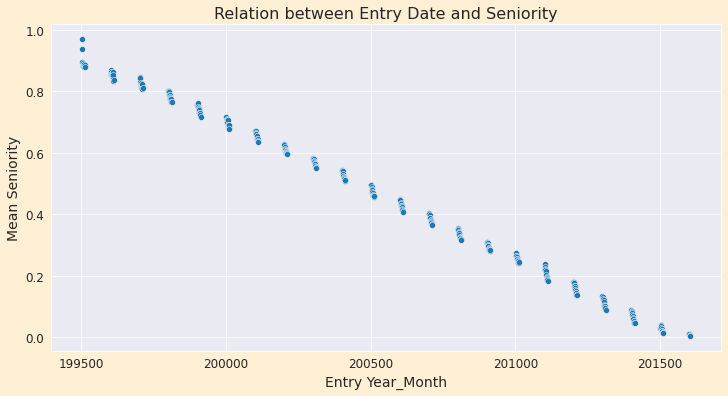

In [16]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.scatterplot(corr_df1.index,corr_df1.values,palette="rocket_r")
plt.title('Relation between Entry Date and Seniority', fontsize=16)
plt.ylabel('Mean Seniority', fontsize=14)
plt.xlabel("Entry Year_Month", fontsize= 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<b>Yes, there is negative correlation between these two features. Hence, we can remove one of them. Preferably, I will get rid of Entry Date </b>

Similarly, Province Name and Province Code should have one to one mapping. Hence, we can drop one of them.

In [17]:
corr_df2= train_treated[['CustomerID','ProvinceCode','ProvinceName']]
corr_df2 = corr_df2.drop_duplicates()
corr_df2 = corr_df2.sort_values(by=['ProvinceCode','ProvinceName'])
corr_df2 = pd.DataFrame(corr_df2.groupby(['ProvinceCode','ProvinceName'])['CustomerID'].nunique().reset_index())

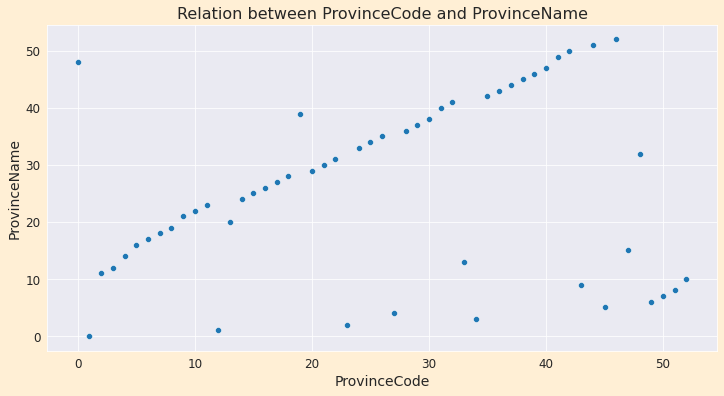

In [18]:
plt.figure(figsize=(12,6),facecolor='papayawhip')
sns.set_style("darkgrid")
sns.scatterplot(corr_df2.ProvinceCode ,corr_df2.ProvinceName)
plt.title('Relation between ProvinceCode and ProvinceName', fontsize=16)
plt.xlabel("ProvinceCode", fontsize= 14)
plt.ylabel('ProvinceName', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<b>Dropping EntryDate and ProvinceName from Train and Test Data.</b>

In [19]:
train_vec = train_treated.drop(['EntryDate','ProvinceName'],axis=1)
test_vec = test_treated.drop(['EntryDate','ProvinceName'],axis=1)

In [22]:
import gc
# del age_minmax_test
# del age_minmax_tr
# del cat_cols
# del cat_feat
# del cat_map_dict
# del inc_minmax_test
# del inc_minmax_tr
# del mm_scaler_age
# del mm_scaler_inc
# del mm_scaler_sen
# del sen_minmax_test
# del sen_minmax_tr
# del corr_df1
# del corr_df2
# del data
# del EntryChannel_enc_test
# del EntryChannel_enc_tr
# del Cust_Country_enc_test
# del Cust_Country_enc_tr
# del ProvinceCode_enc_test
# del ProvinceCode_enc_tr
# del ProvinceName_enc_test
# del ProvinceName_enc_tr
del train_treated
del test_treated
gc.collect()

271

<b>Now, all the features are represented in numerical form. Hence, we can represent any data point as vector.</b>

In [25]:
train_vec.head()

,Date,CustomerID,Employee,Cust_Country,Sex,Age,New,Seniority,PrimaryCustomer,CustomerType,CustomerRelationType,SameResidenceCountry,OtherBirthCountry,EntryChannel,ProvinceCode,GrossIncome,Segment,Deceased,Active,CurrentAccounts,DerivadaAccount,PayrollAccount,JuniorAccount,MoreParticularAccount,ParticularAccount,ParticularPlusAccount,E_Account,Funds,Pensions_1,Loans,Taxes,CreditCard,Securities,Payroll,Pensions_2,DirectDebit
0,2015-01-28,1375586,1,37,1,0.34,0.0,0.02,1.0,1,2,1,2,154,22,0.06,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,1,37,0,0.21,0.0,0.14,1.0,1,1,1,1,151,5,0.02,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,1,37,0,0.21,0.0,0.14,1.0,1,1,1,2,151,5,0.08,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,1,37,1,0.20,0.0,0.14,1.0,1,1,1,2,150,46,0.08,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,1,37,0,0.21,0.0,0.14,1.0,1,2,1,2,151,46,0.06,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [26]:
test_vec.head()

,Date,CustomerID,Employee,Cust_Country,Sex,Age,New,Seniority,PrimaryCustomer,CustomerType,CustomerRelationType,SameResidenceCountry,OtherBirthCountry,EntryChannel,ProvinceCode,GrossIncome,Segment,Deceased,Active
0,2016-06-28,15889,3,37,0,0.55,0,1.00,1,1,2,1,2,25,21,0.21,2,2,NaN
1,2016-06-28,1170544,1,37,1,0.35,0,0.13,1,1,1,1,2,25,23,0.04,0,2,NaN
2,2016-06-28,1170545,1,37,0,0.20,0,0.13,1,1,2,1,2,151,7,0.06,1,2,NaN
3,2016-06-28,1170547,1,37,1,0.20,0,0.13,1,1,1,1,2,151,51,0.10,1,2,NaN
4,2016-06-28,1170548,1,37,1,0.20,0,0.13,1,1,1,1,2,151,50,0.07,1,2,NaN


In [24]:
train_vec.to_pickle('train_vec.pkl')
test_vec.to_pickle('test_vec.pkl')